# Bank Customer Churn Prediction

The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?datasetId=797699&sortBy=voteCount). It contains 10000 rows and 14 columns. The objective of the dataset is to predict whether the customer will leave the bank or not, based on the customer's demographics and financial information included in the dataset.

The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary
| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |

### Importing all the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [6]:
data = pd.read_csv('churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data Preprocessing

In [8]:
data.shape

(10000, 14)

### Dropping the unnecessary columns - RowNumber, CustomerID, Surname

In [10]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [11]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

### Renaming the Column 'Exited' to 'Churn' 

In [15]:
data.rename(columns={'Exited':'Churn'}, inplace=True)

### Descriptive Statistics

In [17]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Exploratiory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable. I will start by looking at the distribution of the data, followed by the relationship between the features and the target variable. 

### Pie Chart for Customer Churn

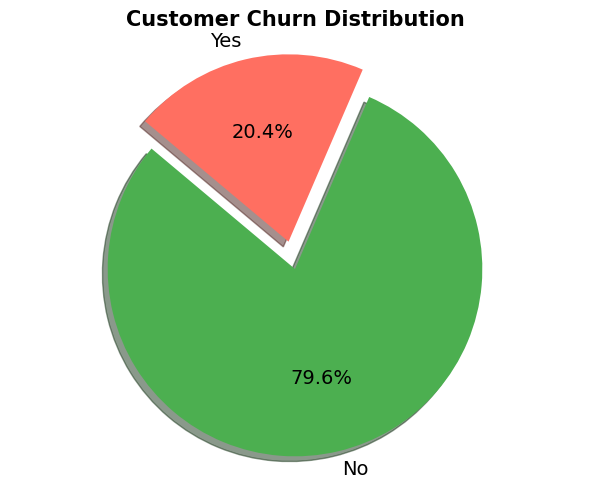

In [21]:
labels = ['No', 'Yes']
sizes = data['Churn'].value_counts()
colors = ['#4CAF50', '#FF6F61']  # Green for 'No', red for 'Yes'
explode = (0.05, 0.1)

plt.figure(figsize=(6, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14, 'color': 'black'}
)
plt.title('Customer Churn Distribution', fontsize=15, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with only 20.4% of the customers churning.

### Gender Distribution Chart

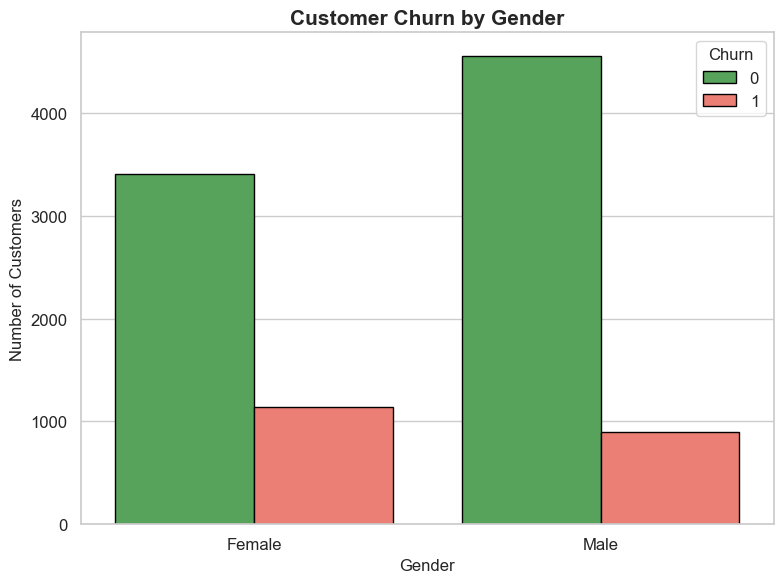

In [24]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(
    x='Gender',
    data=data,
    hue='Churn',
    palette=['#4CAF50', '#FF6F61'],  # Green for 'No', Red for 'Yes'
    edgecolor='black'
)

plt.title('Customer Churn by Gender', fontsize=15, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. However there is not much difference between the churn count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer. 

### Age Distribution

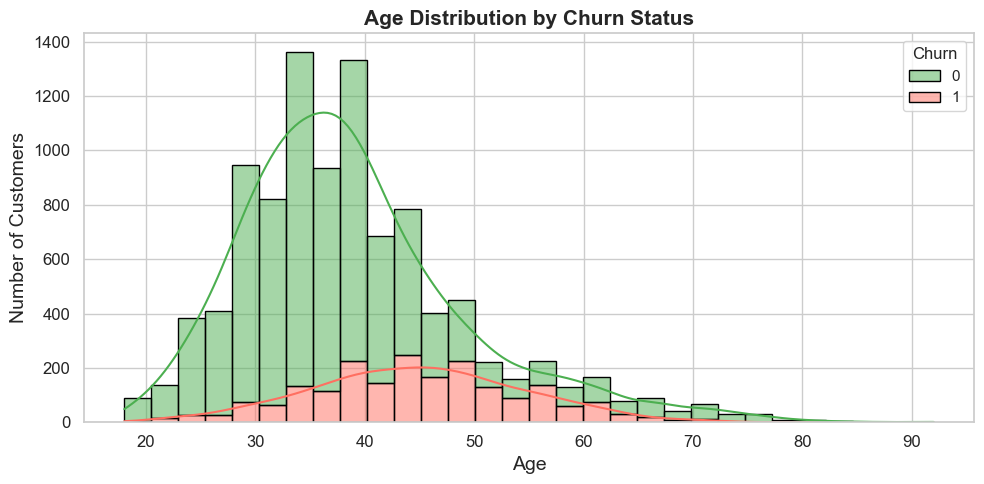

In [27]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.histplot(
    data=data,
    x="Age",
    hue="Churn",
    multiple="stack",
    kde=True,
    palette=["#4CAF50", "#FF6F61"],  # Green for 'No', Red for 'Yes'
    edgecolor="black",
    bins=30
)

plt.title("Age Distribution by Churn Status", fontsize=15, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

This histtogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

### Credit Score Dsitribution

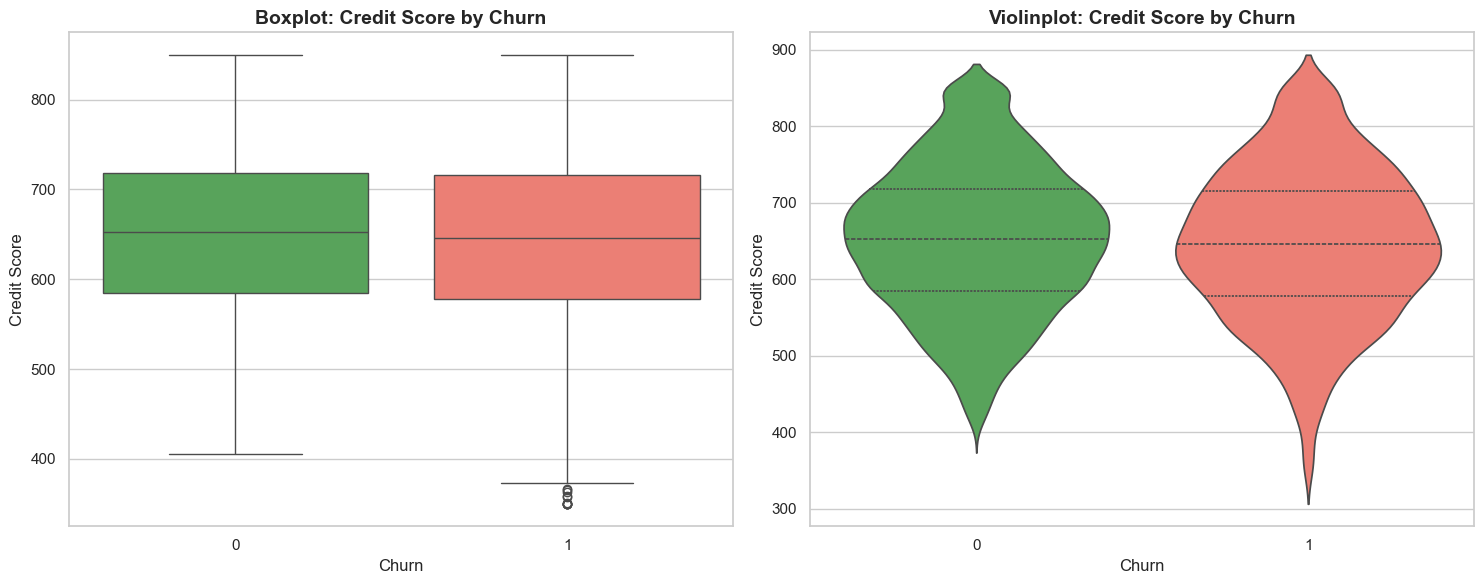

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot: Credit Score vs Churn
sns.boxplot(
    x="Churn", 
    y="CreditScore", 
    data=data, 
    ax=ax[0], 
    palette=["#4CAF50", "#FF6F61"]
)
ax[0].set_title("Boxplot: Credit Score by Churn", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Churn", fontsize=12)
ax[0].set_ylabel("Credit Score", fontsize=12)

# Violinplot: Credit Score vs Churn
sns.violinplot(
    x="Churn", 
    y="CreditScore", 
    data=data, 
    ax=ax[1], 
    palette=["#4CAF50", "#FF6F61"],
    inner="quartile"  # shows median and quartiles inside the violin
)
ax[1].set_title("Violinplot: Credit Score by Churn", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Churn", fontsize=12)
ax[1].set_ylabel("Credit Score", fontsize=12)

plt.tight_layout()
plt.show()

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

### Customer Location Distribution

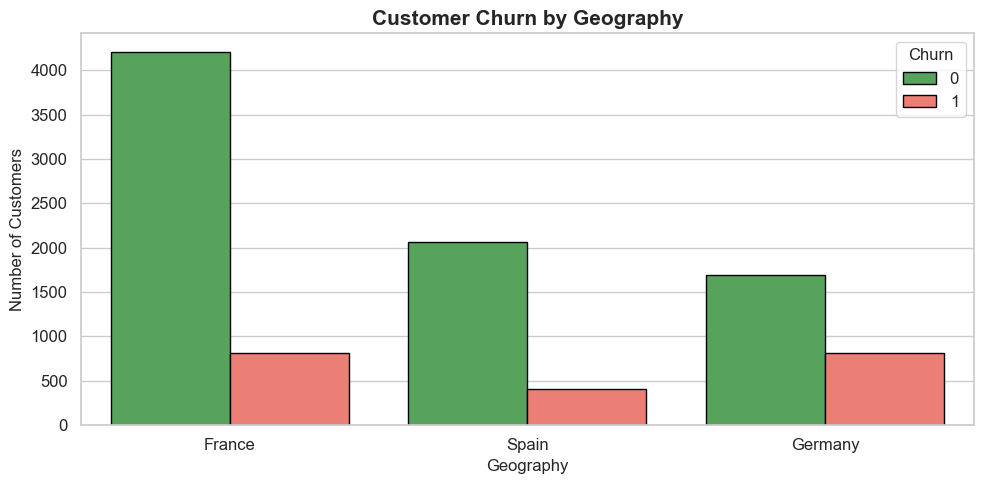

In [33]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(
    x='Geography',
    data=data,
    hue='Churn',
    palette=['#4CAF50', '#FF6F61'],  # Green for 'No', Red for 'Yes'
    edgecolor='black'
)

plt.title('Customer Churn by Geography', fontsize=15, fontweight='bold')
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

This graphs shows the number of customers from the their repective countries aling with their churn count. Majority of the customers are from France, followed by Spain and Germany. However in contrast to that Germany has the highest number of customer curn followed by France and Spain. From this we can infer that German customers are more likely to churn than the customers from other countries.

### Tenure Distribution

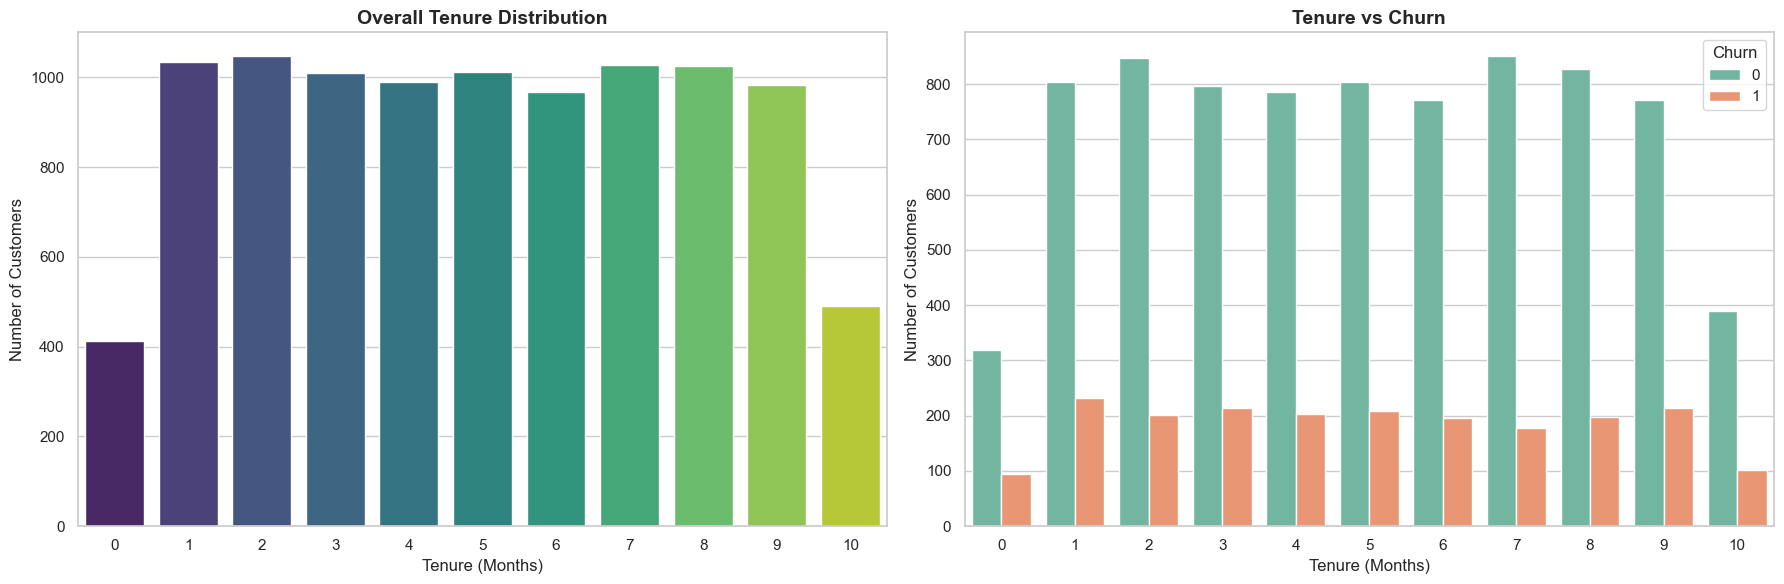

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Overall Tenure Distribution
sns.countplot(
    x='Tenure',
    data=data,
    palette='viridis',
    ax=ax[0]
)
ax[0].set_title('Overall Tenure Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Tenure (Months)')
ax[0].set_ylabel('Number of Customers')
# ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Tenure Distribution by Churn
sns.countplot(
    x='Tenure',
    hue='Churn',
    data=data,
    palette='Set2',
    ax=ax[1]
)
ax[1].set_title('Tenure vs Churn', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Tenure (Months)')
ax[1].set_ylabel('Number of Customers')
# ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

### Customer Churn by Bank Balance

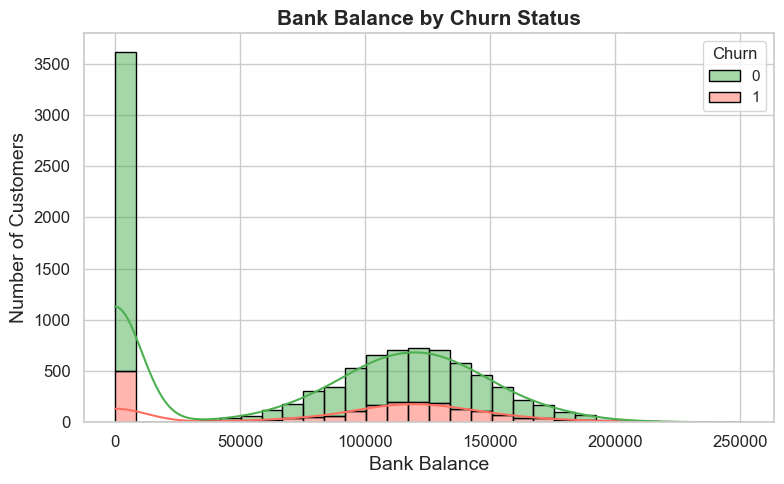

In [39]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.histplot(
    data=data,
    x="Balance",
    hue="Churn",
    multiple="stack",
    kde=True,
    palette=["#4CAF50", "#FF6F61"],  # Green for 'No', Red for 'Yes'
    edgecolor="black",
    bins=30
)

plt.title("Bank Balance by Churn Status", fontsize=15, fontweight='bold')
plt.xlabel("Bank Balance", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

### Number of Product Purchased by Churn

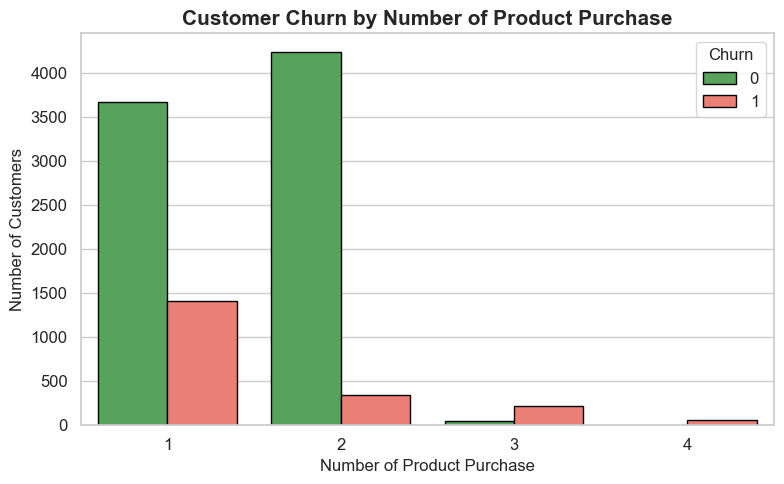

In [42]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(
    x='NumOfProducts',
    data=data,
    hue='Churn',
    palette=['#4CAF50', '#FF6F61'],  # Green for 'No', Red for 'Yes'
    edgecolor='black'
)

plt.title('Customer Churn by Number of Product Purchase', fontsize=15, fontweight='bold')
plt.xlabel('Number of Product Purchase', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In the dataset, we have customers in four categories according to the number of products purchased. The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers. Therefore, the number of product purchased is a good indicator of customer churn.

### Customer With/Without Credit Card

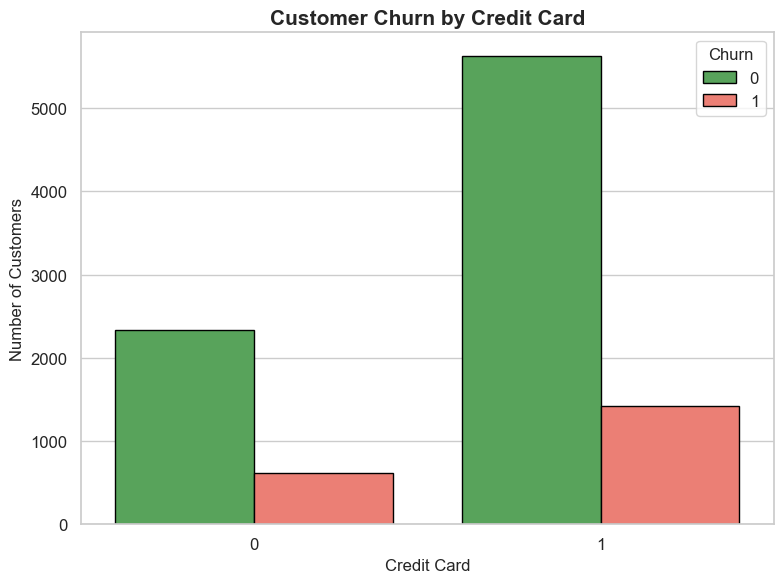

In [45]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(
    x='HasCrCard',
    data=data,
    hue=data['Churn'],
    palette=['#4CAF50', '#FF6F61'],  # Green for 'No', Red for 'Yes'
    edgecolor='black'
)

plt.title('Customer Churn by Credit Card', fontsize=15, fontweight='bold')
plt.xlabel('Credit Card', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Majoity of the customers have credit cars i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. Moreover, the number of customers leaving the bank are more whom have a credit card.

### Active Members

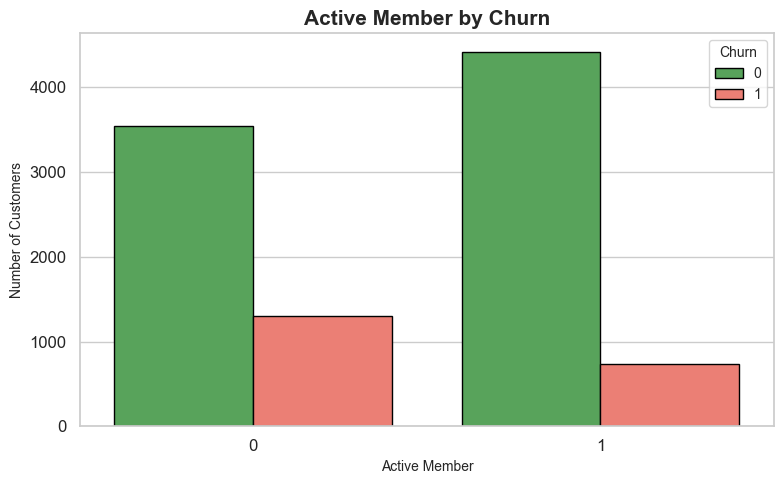

In [48]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(
    x='IsActiveMember',
    data=data,
    hue=data['Churn'],
    palette=['#4CAF50', '#FF6F61'],  # Green for 'No', Red for 'Yes'
    edgecolor='black'
)

plt.title('Active Member by Churn', fontsize=15, fontweight='bold')
plt.xlabel('Active Member', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.legend(title='Churn', fontsize=10, title_fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

As expected, the churn count is higher for non active members as compared to the active members of the bank. This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank. Therefore, the bank should focus on the non active members and try to improve their services to retain them.

### Estimated Salary by Churn

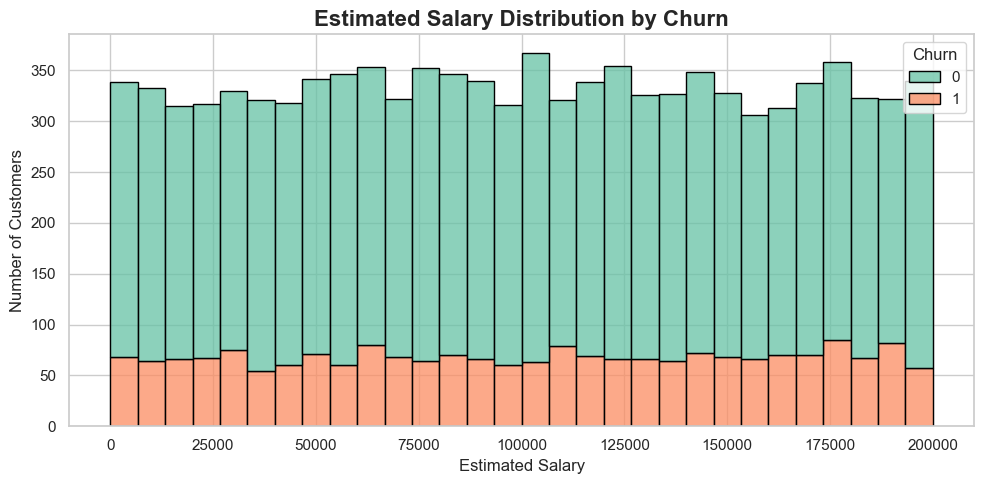

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='EstimatedSalary',
    hue='Churn',
    multiple='stack',
    palette='Set2',
    edgecolor='black',
    bins=30
)

plt.title('Estimated Salary Distribution by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

# Data Preprocessing 2

## Label Encoding

In [55]:
le=LabelEncoder()

variables = ['Geography','Gender']

for i in variables:
    le.fit(data[i].unique())
    data[i]=le.transform(data[i])
    print(i,data[i].unique())

Geography [0 2 1]
Gender [0 1]


## Normalization

In [57]:
scaler = StandardScaler()
data[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(data[['CreditScore','Balance','EstimatedSalary']])

In [58]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0
5,-0.057205,2,1,44,8,0.597329,2,1,0,0.863650,1
6,1.774174,0,1,50,7,-1.225848,2,1,1,-1.565487,0
7,-2.840488,1,0,29,4,0.618019,4,1,0,0.334854,1
8,-1.547141,0,1,44,4,1.050820,2,0,1,-0.437329,0
9,0.346319,0,1,27,2,0.931463,1,1,1,-0.493230,0


## Coorelation Matrix Heatmap

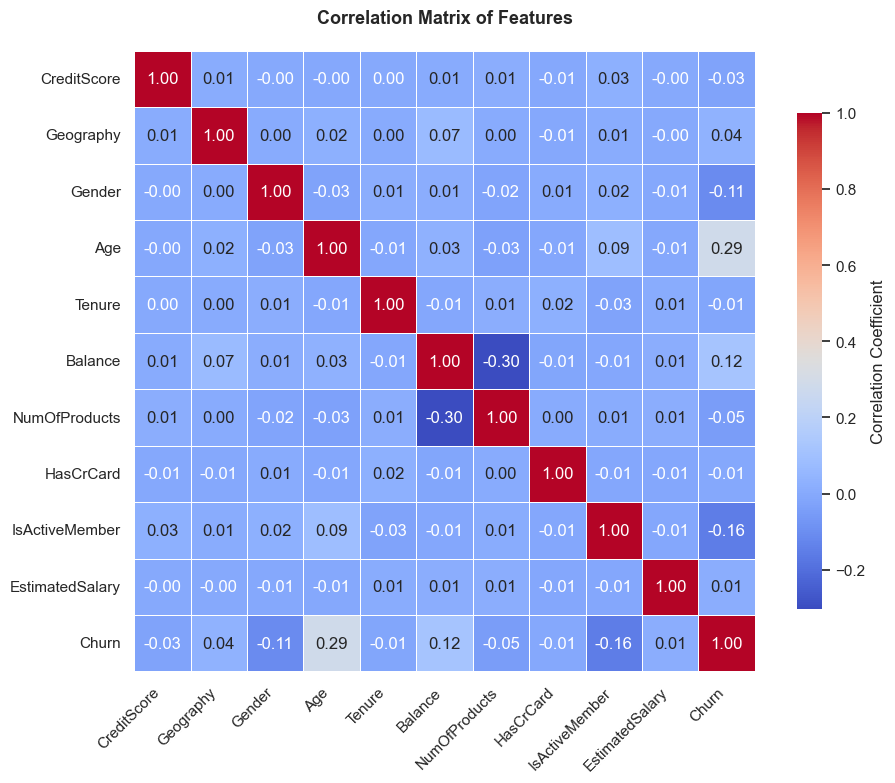

In [60]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix of Features', fontsize=13, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

There is no significant coorelation among the variables. So, I will proceed to model building.

## Train and Test Split

In [63]:
X = data.drop('Churn',axis=1)
y = data['Churn']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=42)

## Churn Prediction
For predicting the churn of customers, depending on the data of the customers, we will use the following models:
- Decision Tree Classifier
- Random Forest Classifier

## Decision Tree Classifier

#### Using GridSearchCV to find the best parameters for the model

In [67]:
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}


In [68]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

### Model Training and Accuracy

In [70]:
#training the model
dtree.fit(X_train,y_train)

#training accuracy
print("Decision Tree Model's Accuracy Score: ", dtree.score(X_train,y_train))

Decision Tree Model's Accuracy Score:  0.8581428571428571


In [71]:
dtree_pred = dtree.predict(X_test)

In [72]:
dtree_pred.shape

(3000,)

## Random Forest Classfier

In [74]:
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [75]:
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

### Model Training and Accuracy

In [77]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
print("Random Forest Classifier Model's Score: ", rfc.score(X_train, y_train))

Random Forest Classifier Model's Score:  0.8767142857142857


In [78]:
rfc_pred = rfc.predict(X_test)

In [79]:
rfc_pred.shape

(3000,)

# Model Evaluation

## Decision Tree Classifier

### Confusion Matrix Heatmap

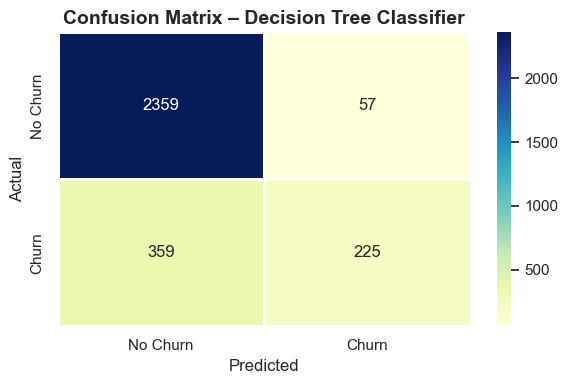

In [83]:
plt.figure(figsize=(6, 4))

cm = confusion_matrix(y_test, dtree_pred)
labels = ['No Churn', 'Churn']
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=labels, yticklabels=labels,
            linewidths=1, linecolor='white')

# Labels and title
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix – Decision Tree Classifier', fontsize=14, fontweight='bold')

# layout
plt.tight_layout()
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

### Distribution Plot

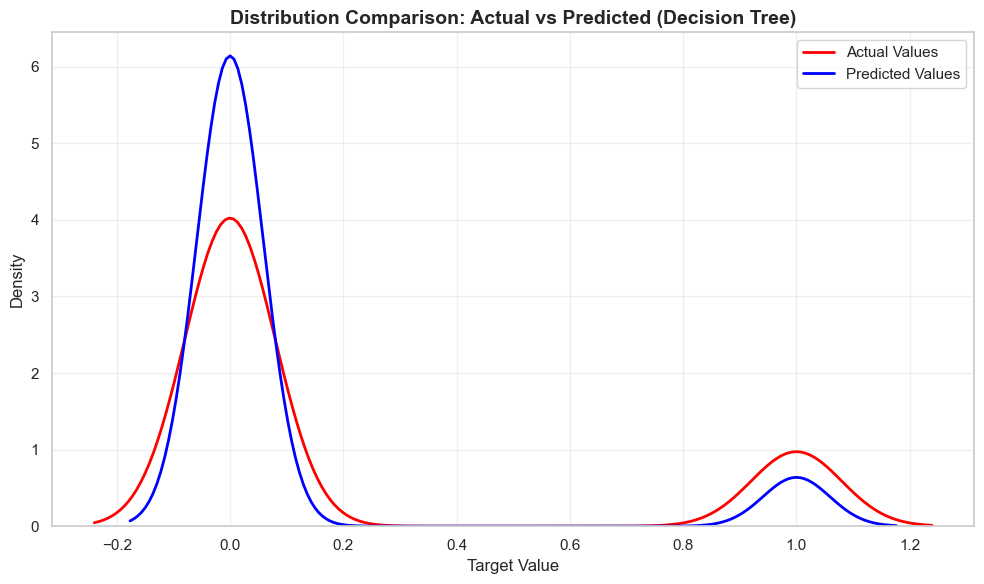

In [86]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="Actual Values", color="red", linewidth=2)
sns.kdeplot(dtree_pred, label="Predicted Values", color="blue", linewidth=2)

plt.title('Distribution Comparison: Actual vs Predicted (Decision Tree)', fontsize=14, fontweight='bold')
plt.xlabel('Target Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Metrics Score

In [88]:
print("classification_report: ", classification_report(y_test, dtree_pred))
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

classification_report:                precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000

Accuracy Score:  0.8613333333333333
Mean Absolute Error:  0.13866666666666666
R2 Score:  0.11548580241313633


## Random Forest Classifier

### Confusion Matrix Heatmap

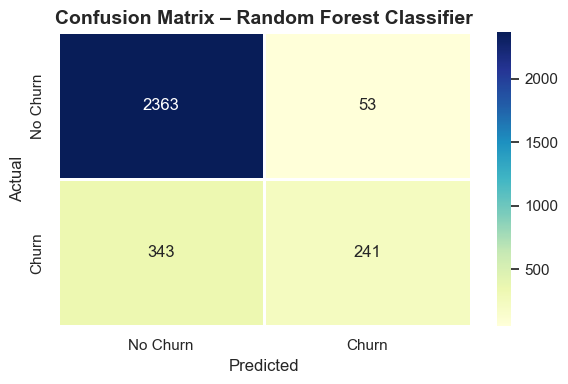

In [91]:
plt.figure(figsize=(6, 4))

cm = confusion_matrix(y_test, rfc_pred)
labels = ['No Churn', 'Churn']
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=labels, yticklabels=labels,
            linewidths=1, linecolor='white')

# Labels and title
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix – Random Forest Classifier', fontsize=14, fontweight='bold')

# layout
plt.tight_layout()
plt.show()

The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

### Distribution Plot

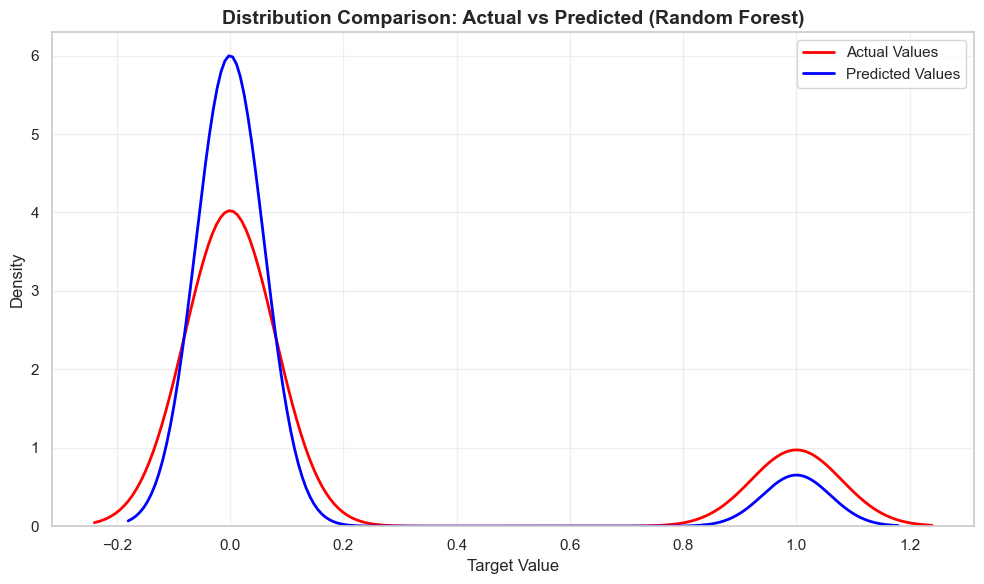

In [94]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="Actual Values", color="red", linewidth=2)
sns.kdeplot(rfc_pred, label="Predicted Values", color="blue", linewidth=2)

plt.title('Distribution Comparison: Actual vs Predicted (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Target Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The more overlapping of two colors, The more accurate the model is.

### Metric Score

In [97]:
print("classification_report: ", classification_report(y_test, rfc_pred))
print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

classification_report:                precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy Score:  0.868
Mean Absolute Error:  0.132
R2 Score:  0.15801052345096633


## Conclusion

From the exploratory data analysis, I have concluded that the churn count of the customersdepends upon the following factors:
1. Age
2. Geography
3. Tenure
4. Balance
5. Number of Products
6. Has Credit Card
7. Is Active Member

Coming to the classification models, I have used the following models:
1. Decision Tree Classifier
2. Random Forest Classifier

Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. But, the Random Forest Classifier has a better accuracy and precision score than the Decision Tree Classifier.